# Milestone 2

##### Carlos Diaz Molina
---
In this milestone we will interact with the data (i.e. the rows and columns), to help us direct our study and analysis of the data. By doing this, we will be able to answer the research questions we may have.

>Firstly, we would load the data using the function

`pd.read_csv()`

However, on this file, we will process the csv in the next cell using `load_and_process()`

In [2]:
import sys, os
sys.path.insert(0, os.path.abspath('..'))
from scripts.project_functions import *

data ='../../data/raw/Gamesales.csv'
df = load_and_process(data)
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Darksiders,X360,2010.0,Action,THQ,0.67,0.28,0.01,0.10,1.06,83.0,81.0,7.9,292.0,Vigil Games,M
1,Frogger 3D,3DS,2011.0,Action,Konami Digital Entertainment,0.16,0.03,0.00,0.01,0.21,54.0,11.0,5.5,8.0,Alpha Unit,E
2,BeyBlade VForce: Super Tournament Battle,GC,2002.0,Action,Atari,0.16,0.04,0.00,0.01,0.21,33.0,6.0,7.5,18.0,Takara,E
3,Power Rangers: Wild Force,GBA,2002.0,Action,THQ,0.15,0.05,0.00,0.00,0.21,55.0,4.0,6.9,8.0,Natsume,E
4,Tenchu: Shadow Assassins,Wii,2008.0,Action,Ubisoft,0.15,0.01,0.03,0.01,0.21,70.0,35.0,7.8,24.0,Acquire,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6820,Commandos 2: Men of Courage,XB,2002.0,Strategy,Eidos Interactive,0.05,0.02,0.00,0.00,0.07,67.0,12.0,8.4,5.0,Pyro Studios,T
6821,Wrath Unleashed,PS2,2004.0,Strategy,LucasArts,0.04,0.03,0.00,0.01,0.07,64.0,25.0,6,6.0,Double Helix Games,T
6822,Kessen III,PS2,2004.0,Strategy,Tecmo Koei,0.04,0.03,0.00,0.01,0.07,73.0,26.0,8.1,20.0,Koei,T
6823,Cities XL 2012,PC,2011.0,Strategy,Focus Home Interactive,0.01,0.05,0.00,0.01,0.07,61.0,18.0,5.6,95.0,Monte Cristo Multimedia,E


## Exploratory Data Analysis

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

print("Number of rows and columns respectively:", df.shape)
print("Columns in the dataset:", df.columns)

Number of rows and columns respectively: (6825, 16)
Columns in the dataset: Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')


In [4]:
df.describe(include='float64')

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000
mean,2007.436777,0.394484,0.236089,0.064158,0.082677,0.777590,70.272088,28.931136,174.722344
std,4.211248,0.967385,0.687330,0.287570,0.269871,1.963443,13.868572,19.224165,587.428538
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2004.000000,0.060000,0.020000,0.000000,0.010000,0.110000,62.000000,14.000000,11.000000
50%,2007.000000,0.150000,0.060000,0.000000,0.020000,0.290000,72.000000,25.000000,27.000000
75%,2011.000000,0.390000,0.210000,0.010000,0.070000,0.750000,80.000000,39.000000,89.000000
max,2016.000000,41.360000,28.960000,6.500000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [5]:
df.describe(include='object')

,Name,Platform,Genre,Publisher,User_Score,Developer,Rating
count,6825,6825,6825,6825,6825,6825,6825
unique,4377,17,12,262,89,1289,7
top,Madden NFL 07,PS2,Action,Electronic Arts,7.8,EA Canada,T
freq,8,1140,1630,944,294,149,2377


#### 1. Initial Remarks

After processing the data and eliminating NaN values, it can be noted that the data (i.e. the number of rows) was reduced to half of the previous amount of total rows. Although this will provide us with more useful information, we might miss some details in the later part of the EDA.

#### 2. Work with data

We will focus on the Genre of games that were taken into account in this dataset, as well as the number of sales that have taken place overall. 

 We will create two data frames, which will be used for different purposes each.

In [6]:
df1 = df.groupby('Year_of_Release', as_index=False).sum()
df1.head()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
0,1985.0,0.00,0.03,0.00,0.01,0.03,59.0,9.0,19.0
1,1988.0,0.00,0.02,0.00,0.01,0.03,64.0,75.0,4572.0
2,1992.0,0.02,0.00,0.00,0.00,0.03,85.0,44.0,1796.0
3,1994.0,0.39,0.26,0.53,0.08,1.27,69.0,4.0,4.0
4,1996.0,7.91,6.88,4.06,1.24,20.10,626.0,83.0,4970.0


In [7]:
df2 = df.drop(columns=['Year_of_Release', 'Critic_Score', 'Critic_Count']).groupby('Genre', as_index=False).sum()
df2.head()

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,User_Count
0,Action,591.23,387.78,76.17,147.46,1203.16,329589.0
1,Adventure,38.81,25.06,8.73,8.05,80.75,28463.0
2,Fighting,136.39,60.50,27.85,25.14,249.95,25154.0
3,Misc,222.05,120.46,33.22,40.41,416.26,12844.0
4,Platform,193.60,108.56,43.09,32.53,377.80,46180.0


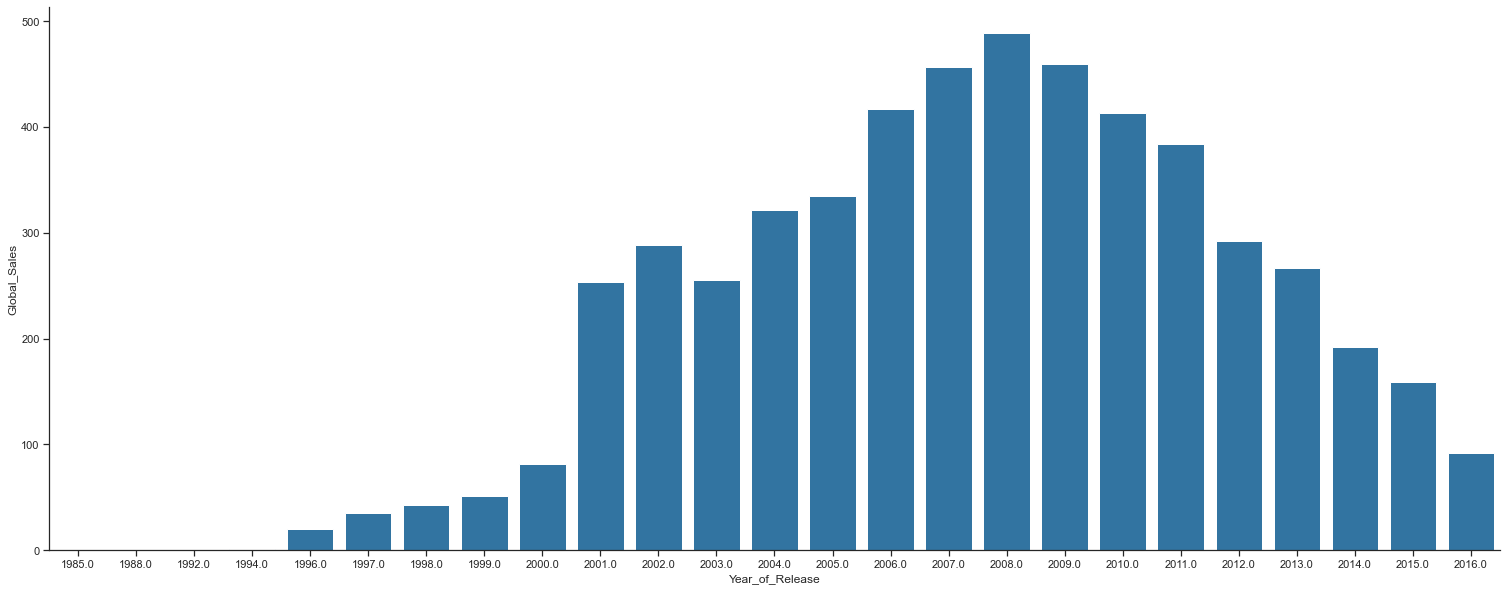

In [8]:
sns.set_theme(style="ticks", font_scale=1)
plt.figure(figsize=(26,10))
sns.barplot(x="Year_of_Release", y="Global_Sales", data=df1, color="tab:blue")
sns.despine()

It can be seen that, the number of global sales increases as time passes, reaching it highest peak on 2008. However, it is intersting how the data shows that global sales starts decreasing from here on. It would be intersting to see if this also takes place in some of the regions (such as NA or EU).

**Let us look at genre now:**

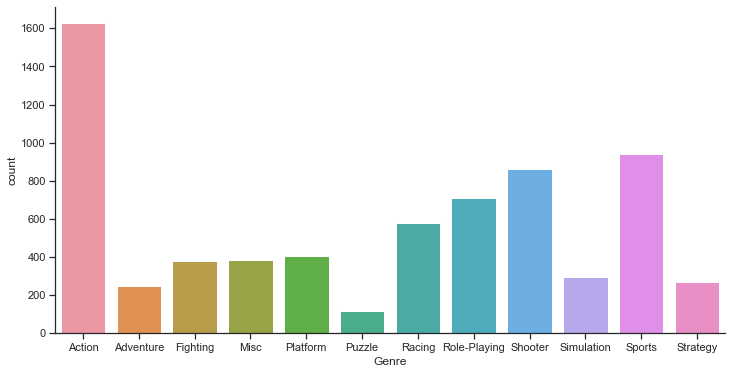

In [9]:
plt.figure(figsize=(12,6))
sns.countplot(x="Genre", data=df)
sns.despine()

From this graph, it can be seen that the majority of games that are created are part of the Action genre, while the second place is held by Sports games. Maybe this trend will remain the same for sales/popularity of genre?

**Let us look at User Count**

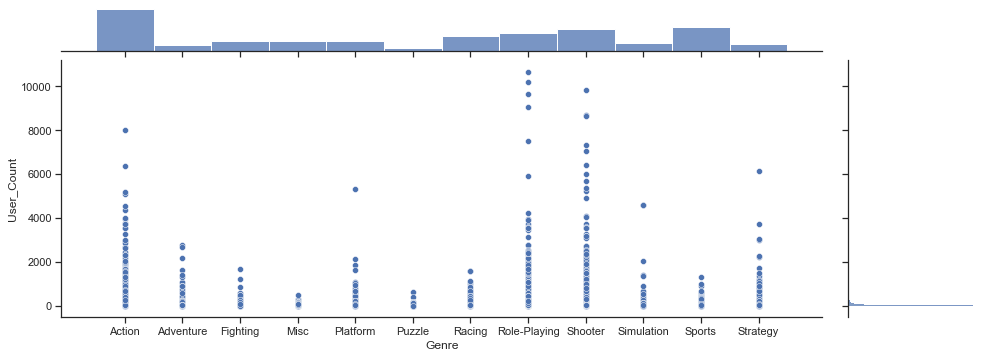

In [11]:
ax = sns.jointplot(data=df, x="Genre", y="User_Count")
ax.fig.set_size_inches(15,5)

From this plot, it can be seen that the number of users for the genre of Action (based on the bar on the top) in total is greater that all the other genres. However, there are some games in the other genres which have great amount of players as well